In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [2]:
customer = pd.read_csv("data/customerRegressionFull.csv")

In [3]:
customer.head()

,age,Computer,TV,Cellphone,Software,Monetary3,Monetary60
0,37,4,1,0,2,1.607621e+06,3.220018e+06
1,21,4,1,1,1,1.654844e+06,4.792484e+06
2,20,1,2,2,1,1.884846e+06,4.681646e+06
3,11,0,3,0,2,1.415478e+06,5.861252e+06
4,17,0,2,1,0,1.669848e+06,3.914121e+06


In [4]:
customer.describe()

,age,Computer,TV,Cellphone,Software,Monetary3,Monetary60
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,1.300000e+04,1.300000e+04
mean,25.046462,3.016154,1.491538,0.997692,3.504231,1.902235e+06,5.702409e+06
std,8.995840,1.994465,1.118870,0.818564,2.288248,4.604723e+05,2.028901e+06
min,10.000000,0.000000,0.000000,0.000000,0.000000,5.632493e+05,4.924054e+04
25%,17.000000,1.000000,0.000000,0.000000,2.000000,1.575859e+06,4.304843e+06
50%,25.000000,3.000000,1.000000,1.000000,3.000000,1.869747e+06,5.616521e+06
75%,33.000000,5.000000,2.000000,2.000000,6.000000,2.190582e+06,7.001595e+06
max,40.000000,6.000000,3.000000,2.000000,7.000000,3.867106e+06,1.459052e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdbfc05908>,
      dtype=object)

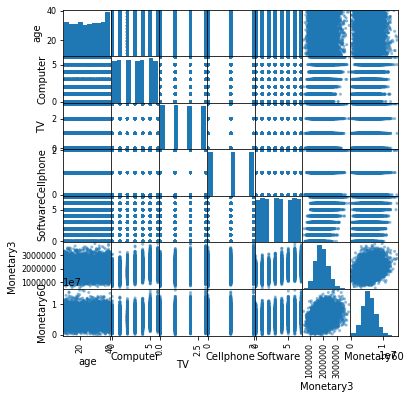

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(customer, figsize = (6, 6))

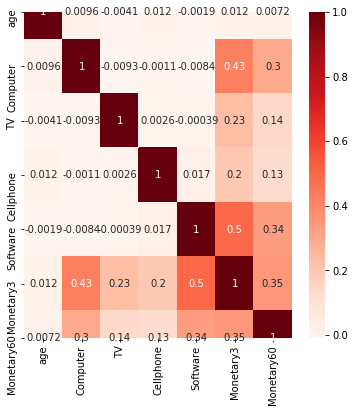

In [9]:
import seaborn as sns 

plt.figure(figsize=(6,6))
cor = customer.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):

    vif = pd.DataFrame()
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]

    return(vif)

In [14]:
customer2 = customer.drop(['Monetary60'], axis=1)

calc_vif(customer2)

,variables,VIF
0,age,6.273384
1,Computer,4.568234
2,TV,3.102136
3,Cellphone,2.665495
4,Software,5.073863
5,Monetary3,24.175428


In [16]:
import statsmodels.api as sm 

x = customer.drop(['Monetary60'],axis=1)
y = customer['Monetary60']

x_train, x_test, y_train, y_test = train_test_split(x, y)

X_train = sm.add_constant(x_train)

model = sm.OLS(y_train,X_train).fit()

/Users/fastbat/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Monetary60   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     517.9
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:17:06   Log-Likelihood:            -1.5409e+05
No. Observations:                9750   AIC:                         3.082e+05
Df Residuals:                    9743   BIC:                         3.082e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.087e+06   9.18e+04     33.642      0.000    2.91e+06    3.27e+06
age          754.5984   1994.216      0.378      0.705   -3154.479    4663.675
Computer    3.253e+05   1.06e+04     30.644      0.000    3.05e+05    3.46e+05
TV          2.657e+05   1.69e+04     15.695      0.000    2.33e+05    2.99e+05
Cellphone   3.086e+05   2.27e+04     13.574      0.000    2.64e+05    3.53e+05
Software     3.01e+05   9724.925     30.956      0.000    2.82e+05     3.2e+05
Monetary3     -0.0813      0.057     -1.434      0.152      -0.193       0.030
==============================================================================
Omnibus:                        9.910   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.268
Skew:                           0.010   Prob(JB):                      0.00357
Kurtosis:                       3.165   Cond. No.                     1.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_train = X_train.drop(['age'], axis=1)

model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Monetary60   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     621.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:17:32   Log-Likelihood:            -1.5409e+05
No. Observations:                9750   AIC:                         3.082e+05
Df Residuals:                    9744   BIC:                         3.082e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.105e+06   7.78e+04     39.927      0.000    2.95e+06    3.26e+06
Computer    3.253e+05   1.06e+04     30.646      0.000    3.05e+05    3.46e+05
TV          2.657e+05   1.69e+04     15.694      0.000    2.32e+05    2.99e+05
Cellphone   3.087e+05   2.27e+04     13.580      0.000    2.64e+05    3.53e+05
Software     3.01e+05   9723.500     30.956      0.000    2.82e+05     3.2e+05
Monetary3     -0.0810      0.057     -1.428      0.153      -0.192       0.030
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.181
Skew:                           0.010   Prob(JB):                      0.00373
Kurtosis:                       3.165   Cond. No.                     8.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_train = X_train.drop(['Monetary3'], axis=1)

model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Monetary60   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     776.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:17:48   Log-Likelihood:            -1.5409e+05
No. Observations:                9750   AIC:                         3.082e+05
Df Residuals:                    9745   BIC:                         3.082e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.025e+06   5.33e+04     56.693      0.000    2.92e+06    3.13e+06
Computer    3.172e+05   8977.890     35.335      0.000       3e+05    3.35e+05
TV          2.578e+05    1.6e+04     16.113      0.000    2.26e+05    2.89e+05
Cellphone   3.002e+05   2.19e+04     13.679      0.000    2.57e+05    3.43e+05
Software    2.927e+05   7811.861     37.472      0.000    2.77e+05    3.08e+05
==============================================================================
Omnibus:                        9.897   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.255
Skew:                           0.009   Prob(JB):                      0.00360
Kurtosis:                       3.165   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
x_test = x_test.drop(['age', 'Monetary3'],axis=1)
X_test = sm.add_constant(x_test)

y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_pred, y_test))
rmse

1771234.4575436483

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred, y_test)
mae

1405138.5514739016